In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

In [2]:
system = mm.System(name="first_ubermag_simulation")

In [3]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in the x-direction (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)

In [18]:
%prun
L = 100e-9  # cubic sample edge length (m)
d = 2e-9  # discretisation cell size (m)
mesh = df.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Ms = 8e6  # saturation magnetisation (A/m)

orig_field = df.Field(mesh, dim=3, value=(0, 1, 0), norm=Ms)
system.m = orig_field

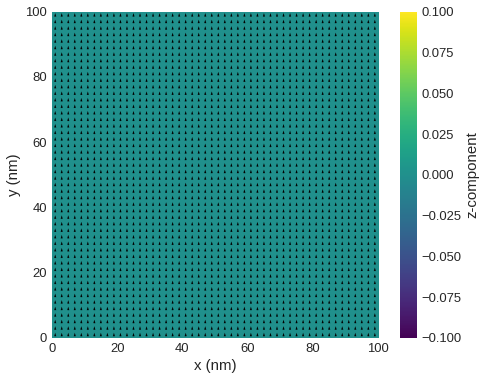

In [5]:
system.m.plane("z").mpl()

In [6]:
import mumax3c as mc

In [7]:
md = mc.MinDriver()

In [20]:
%%time
md.drive(system)

Running mumax3 (ExeMumax3Runner) [2022/04/20 14:10]... (0.9 s)
 

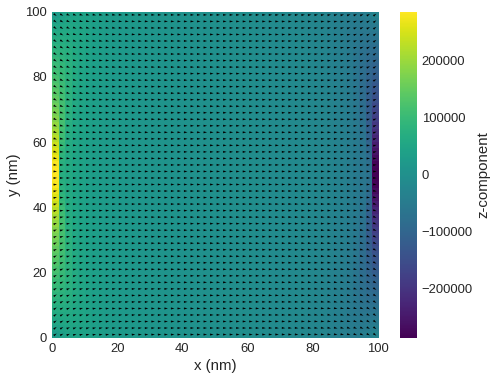

In [9]:
system.m.plane("z").mpl()

In [10]:
import oommfc as oc

In [11]:
system_oommf = mm.System(name="oommf_sim")
system_oommf.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)
system_oommf.m = orig_field

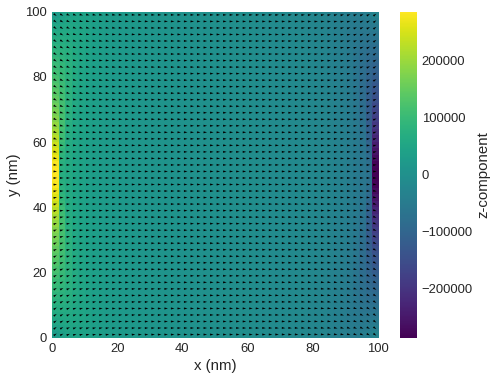

In [12]:
system_oommf.m.plane("z").mpl()

In [13]:
omd = oc.MinDriver()

In [22]:
%%time
omd.drive(system)

Running OOMMF (ExeOOMMFRunner)[2022/04/20 14:13]... (2.4 s)
 

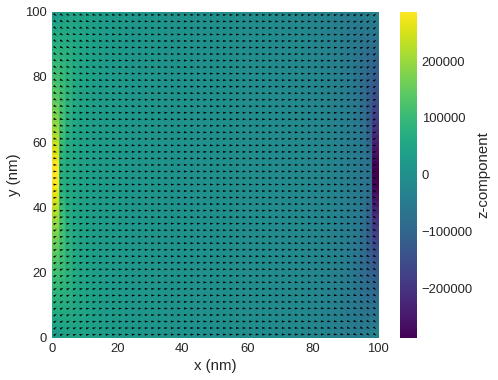

In [15]:
system_oommf.m.plane("z").mpl()